# About
Chapter 12: Election Predictions as Martingales

In [1]:
import numpy as np
import pandas as pd

# Figure 12.1: Price as function of Volatility

Sidenote about *erfc*:
* erfc definition seems to vary depending on source
* The version here from scipy gives output in the range [0, 2]
* By contrast there's plot on the erfc wikipedia page which is in the range [-1, 1]

In [2]:
from scipy.special import erfc, erfinv

def get_binary_price(Y0, sigma, t0, T, l=0):
    """Forecast probability of winning on a binary bet.
    
    For SCFT chapter 12 election prediction
    
    SCFT Equation 12.2

    
    Parameters
    ----------
    Y0 : float
        Current level of the underlying (estimated).
        Between 0 and 1, representing 0 to 100% vote share.
    sigma : float
        Volatility of the shadow brownian motion process.
        Should be non-negative.
    t0 : float
        Current position in time. Should be positive.
    T : float
        Time at maturity. Should be positive.        
    l : float (default: 0)
        Success threshold for the X process. Between -inf and +inf.
        
    Returns
    -------
    price : float
        Binary forecast probability, which can be interpreted as a price.
    """
    
    # TOP
    top = l - erfinv(2*Y0-1) * np.exp((sigma**2)*(T-t0))

    # BOTTOM
    bottom_exponent = 2*(sigma**2)*(T-t0)

    bottom = np.sqrt(np.exp(bottom_exponent)-1)

    # Main Calculation
    price = 0.5*erfc(top/bottom)
    
    return price

In [3]:
def get_sigma(Y0, s, t0, T):
    """Calculate the volatility of the underlying brownian motion.
    
    Maps underlying volatility s to brownian motion volatility sigma.
    
    SCFT Equation 12.2
    
    Parameters
    ----------
    Y0 : float
        Current level of the underlying (estimated).
        Between 0 and 1, representing 0 to 100% vote share.
    s : float
        Volatility of the underlying Y process.
        Should be non-negative.
    t0 : float
        Current position in time. Should be positive.
    T : float
        Time at maturity. Should be positive.        

    Returns:
    sigma : float
        Volatility of the shadow brownian motion process.
    """
    
    top_exponent = 2*erfinv((2*Y0-1)**2)
    top_log_input = 2*np.pi*(s**2)*np.exp(top_exponent)+1
    top = np.sqrt(np.log(top_log_input))
    
    bottom = np.sqrt(2*(T-t0))
    
    sigma = top/bottom
    
    return sigma

In [4]:
def plot_price_df(df, title = 'Price vs. Volatility.', ylabel = 'Binary Formula Price ($)', **kwargs):
    """ Plot Binary Prices against volatility.
    
    Parameters
    ----------
    df : pd.DataFrame
        * Rows are volatility values
        * Columns are vote share fractions
        * Values are the binary price

    Returns
    -------
    ax : matplotlib axis
        * df rows are the x-axis
        * df values are the y-axis
        * df columns are the different lines
    """

    # Plot
    ax = df.plot(title=title,
                 ylabel=ylabel,
                 ylim=[-0.1,1.1],
                 **kwargs);

    # Legend
    legend_labels = [f'{share*100:0.0f} %' for share in df.columns]  # Format as %
    legend_labels

    ax.legend(title='Initial Vote Share:',
              labels = legend_labels,
              loc="center left", bbox_to_anchor=(1, 0.5));
    
    return ax

### Simple Example

In [5]:
# PARAMETERS

Y0 = 0.45  # Vote Share

t0 = 0
T = 30*5  # Time to Maturity

sigma = 0.04  # Volatility magnitude

Notice how the price gets more extreme when the election is about to happen.

Price with lots of time:

In [6]:
get_binary_price(Y0, sigma, t0, T=30*5).round(2)

0.42

Price near election:

In [7]:
get_binary_price(Y0, sigma, t0, T=1).round(2)

0.01

### Tabular Example

Make a DataFrame
* rows = s_values
* columns = Y0_values
* values = binary_prices

In [8]:
# Row Values
s_values = np.arange(0, 0.04, step=0.001)
s_values = pd.Series(s_values, name='volatility')

# Column Values
Y0_values = [0.65, 0.60, 0.55, 0.50, 0.45, 0.40, 0.35]

# Time to Maturity
t0 = 0
T = 30*5  

# Make Columns
data = {}
for Y0_value in Y0_values:
    
    data[Y0_value] = s_values.apply(lambda s_value: get_binary_price(Y0_value, s_value, t0, T))

# Make DataFrame
df = pd.DataFrame(data)
df.columns.name = 'vote_share'
df.index = s_values

display(df.tail().round(2))

vote_share,0.65,0.60,0.55,0.50,0.45,0.40,0.35
volatility,,,,,,,
0.035,0.76,0.68,0.59,0.5,0.41,0.32,0.24
0.036,0.75,0.67,0.59,0.5,0.41,0.33,0.25
0.037,0.75,0.67,0.59,0.5,0.41,0.33,0.25
0.038,0.74,0.67,0.58,0.5,0.42,0.33,0.26
0.039,0.74,0.66,0.58,0.5,0.42,0.34,0.26


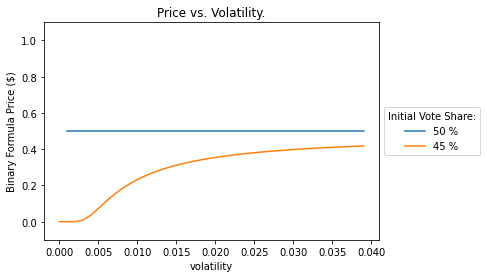

In [9]:
column_selection = [0.5, 0.45]

plot_price_df(df.loc[:, column_selection]);

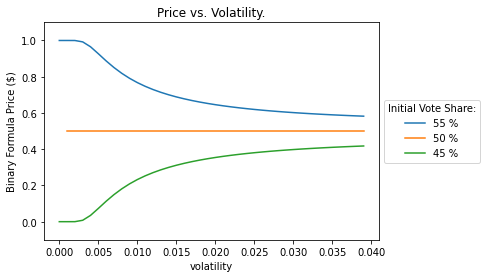

In [10]:
column_selection = [0.55, 0.5, 0.45]

plot_price_df(df.loc[:, column_selection]);

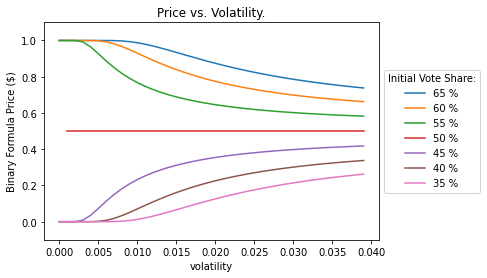

In [11]:
plot_price_df(df);